# Principal Component Analysis (PCA)

James Chapman (jchapman48@gatech.edu)<br>
Ramprasad Research Group, Georgia Institute of Technology

This notebook provides scripts used to perform principal component analysis (PCA) using one of three datasets, including atoms in the periodic table dataset, insulator dataset, and random number dataset. The principal components are new variables that are constructed by linear combination of original variables. The outcome generated by PCA is stored in an object named 'pca', then used to create four plots. A PCA plot (plot 1) shows spread of the dataset in reduced dimension (component space). A loading plot (plot 2) displays how strongly each of original variables influences a principal component. A PCA scree plot (plots 3) shows the explained variances as a function of number of principal components. A cumulative variance plot (plot 4) gives the percentage of variance accounted for by the first n components. 

*NOTICE:  All information contained herein is, and remains the property of Georgia Tech Research Corporation and its sponsors, if any.  The intellectual and technical concepts contained herein are proprietary to Georgia Tech Research Corporation and its sponsors and may be covered by U.S. and Foreign Patents, patents in process, and are protected by trade secret or copyright law. Dissemination of this information or reproduction of this material is strictly forbidden unless prior written permission is obtained from Georgia Tech Research Corporation.*

In [1]:
# Some necessary modules are loaded
import pandas as pd
import numpy as np
import matplotlib as mt
import sklearn as sk
from numpy import genfromtxt
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import MinMaxScaler

In [2]:
########################################################################################
#define functions
def obtain_feature_list(filename,start):
    features = []
    open_file = open(filename,'r')
    for line in open_file:
        data = line.split(',')
        for index,d in enumerate(data):
            if index > start:
                features.append(d)
        break
    return features

def obtain_element_names(filename):
    elements = []
    open_file = open(filename,'r')
    for index,line in enumerate(open_file):
        if index > 0:
            data = line.split(',')
            elements.append(data[0])
    return elements

In [3]:
#file tags
periodic_table = 1
insulators = 0
random_numbers = 0

In [4]:
#read a given set of data
if periodic_table:
    file = 'dataset/__SAMPLE_toy_data_atoms.csv'
    X = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(1,14))
    features = obtain_feature_list(file,0)
    element_list = obtain_element_names(file)  
elif insulators:
    file = 'dataset/__SAMPLE_binary_insulators.csv'
    X = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(1,10))
    features = obtain_feature_list(file,0)
    element_list = obtain_element_names(file)
    
elif random_numbers:
    file = 'dataset/__SAMPLE_toy_data_X1X2X3X4.csv'
    X = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(0,7))
    features = obtain_feature_list(file,-1)    

In [5]:
#normalize the incomining raw data
#normalization is important because original variables may 
#have different scales. Performing PCA on un-normalized varibles
#will lead to large loadings for variables with high variance.
xscale = MinMaxScaler()
X = xscale.fit_transform(X)

#perform PCA on normalized data
pca = PCA()
X_tran = pca.fit_transform(X)

#grab the variance/ration terms
variance = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_

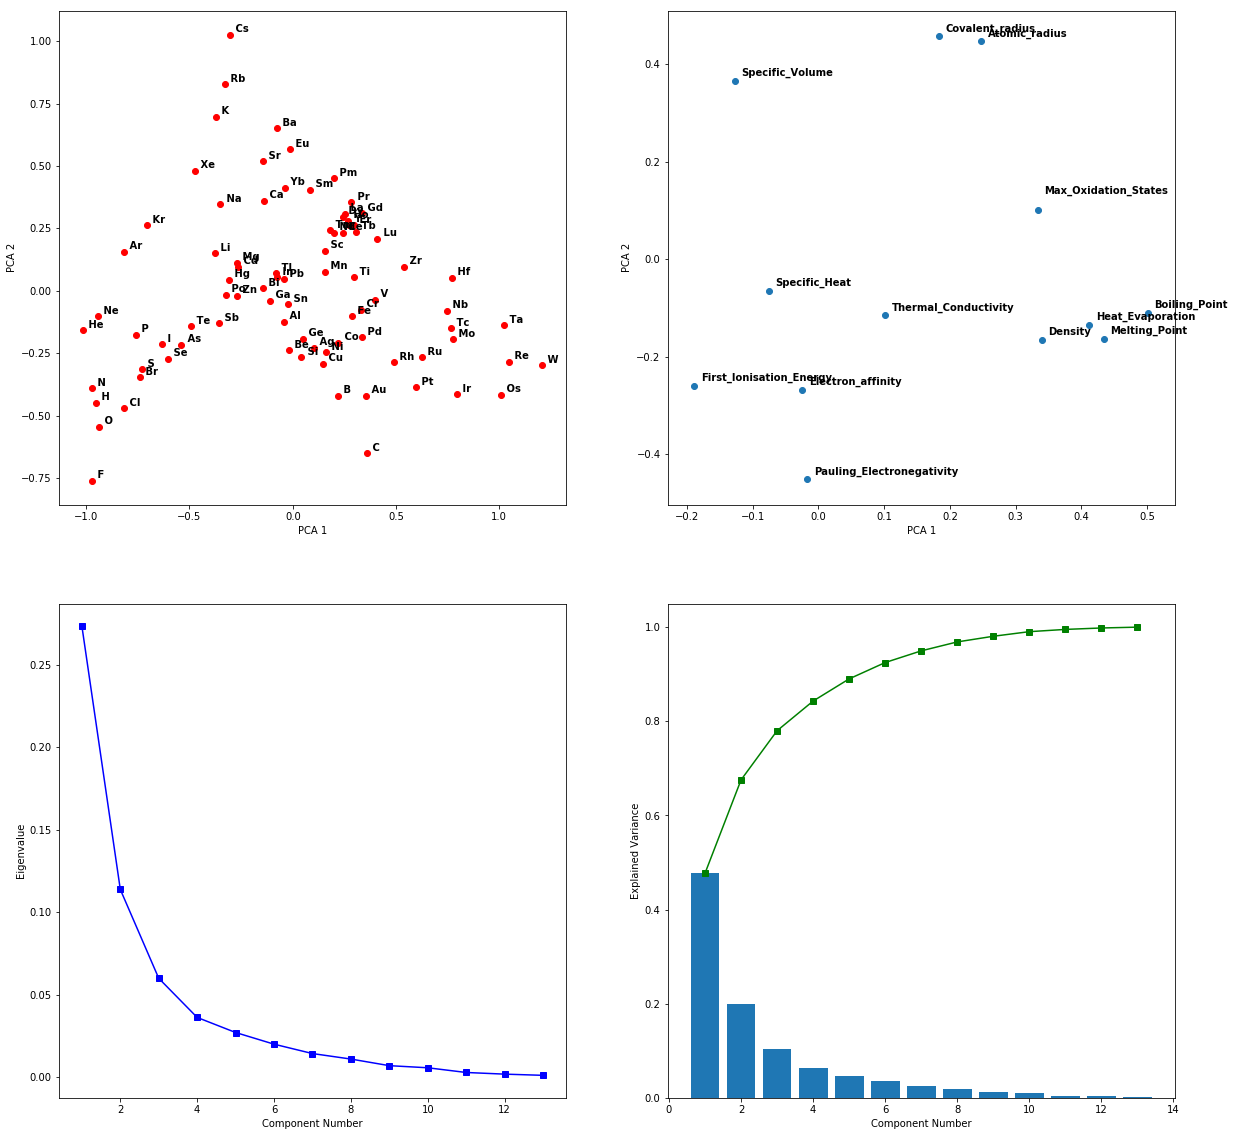

In [6]:
#setup jupyter inline parameters
plt.rcParams['figure.figsize'] = [20, 20]

#initialize plot objects
fig, ax = plt.subplots(2,2)

########################################################################################
#1 - PCA plot
ax[0,0].scatter(X_tran[:,0],X_tran[:,1],color='r')
ax[0,0].set_xlabel('PCA 1')
ax[0,0].set_ylabel('PCA 2')

if periodic_table or insulators:
    for index, labels in enumerate(element_list):
        ax[0,0].text(X_tran[index,0]+0.01, X_tran[index,1]+.01, labels, horizontalalignment='left', size='medium', color='black', weight='semibold')
        
########################################################################################
#2 - Loading plot
ax[0,1].scatter(pca.components_[0, :],pca.components_[1, :])
ax[0,1].set_xlabel('PCA 1')
ax[0,1].set_ylabel('PCA 2')

for index, labels in enumerate(features):
    if index > len(variance) - 1:
        break
    ax[0,1].text(pca.components_[0, index]+0.01, pca.components_[1, index]+.01, labels, horizontalalignment='left', size='medium', color='black', weight='semibold')

########################################################################################
#3 - Scree plot 1
x = np.linspace(1,len(variance),len(variance))
ax[1,0].plot(x,variance,color='b',marker='s')
ax[1,0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1,0].set_xlabel('Component Number')
ax[1,0].set_ylabel('Eigenvalue')

########################################################################################
#4 - Cumulatiuve proportion of variance explained
total_variance = np.zeros(len(variance_ratio))
for index,ratio in enumerate(variance_ratio):
    if index == 0:
        total_variance[index] = ratio
    else:
        total_variance[index] = total_variance[index - 1] + ratio

#Plot the variance ratios
ax[1,1].bar(x,variance_ratio)
ax[1,1].plot(x,total_variance,color='g',marker='s')
ax[1,1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1,1].set_xlabel('Component Number')
ax[1,1].set_ylabel('Explained Variance')

#show the plot
plt.show()